In [6]:
import sys
import numpy as np
from pylab import *
from scipy import *
import matplotlib.pyplot as plt
# Specific imports
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d.axes3d import Axes3D
import pandas as pd
import csv

Bifurcation diagram

In [7]:
bT = pd.read_table("b.mu", skiprows=17, sep='\\s+', header=None)
bT = bT.apply(pd.to_numeric, errors='coerce')
bT

,0,1,2,3,4,5,6,7,8,9,10
0,1,1,9,1,0.000000,0.816497,0.000000e+00,0.000000,-0.000000e+00,0.000000,1.0
1,1,2,4,2,0.054237,0.834688,4.357340e-26,0.111917,0.000000e+00,0.068597,1.0
2,1,3,4,3,0.175660,0.858949,0.000000e+00,-0.010674,0.000000e+00,0.128657,1.0
3,1,4,4,4,0.240482,0.880650,-5.410557e-26,-0.076415,0.000000e+00,0.160372,1.0
4,1,5,4,5,0.337732,0.923477,2.163245e-26,-0.175421,-2.765687e-25,0.207320,1.0
5,1,6,4,6,0.483652,1.007550,6.088685e-25,-0.324806,-6.914124e-25,0.275913,1.0
6,1,7,4,7,0.702635,1.167579,0.000000e+00,-0.550781,-5.292113e-24,0.373322,1.0
7,1,8,4,8,1.027294,1.452523,0.000000e+00,-0.889416,-2.802107e-23,0.501434,1.0
8,1,9,4,9,1.352207,1.769906,0.000000e+00,-1.231986,1.291092e-23,0.604999,1.0
9,1,10,-4,10,1.370001,1.787887,0.000000e+00,-1.250836,-1.237031e-31,0.609866,1.0


Plotting solution from s.XXX file

In [8]:
fl = pd.read_table("s.mu", nrows=0, sep='\\s+')
lst = list(fl)
con = [float(x) for x in lst]
con = [int(x) for x in con]
ibr = int(con[0]) #the index of the branch
ntot = con[1] #the index of the point
itp = con[2] #the type of point
lab = con[3] #the label of the point
nfpr = con[4] #the number of free parameters used in the computation
isw = con[5] #the value of isw used in the computation
ntpl = con[6] #the number of points in the time interval [0,1]
nar = con[7] #the number of values written per point
nrowpr = con[8] #the number of lines printed following the identifying line
ntst = con[9] #the number of time intervals used in the discretization
ncol = con[10] #the number of collocation points used
nparx = con[11] #the dimension of the array par

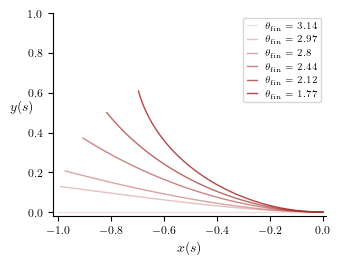

In [11]:
n = 100
fig = plt.figure(figsize = (9.6/2.54,7/2.54))
ax = plt.gca()
legend_array = []
array_points = [0,2,4,6, 7,9]

axis_label_size = 10
tick_size = 8
legend_size = 7
line_thickness = 1.0

ax.set_aspect(0.75)
ax.set_xlim([-1.02,0.01])
ax.set_ylim([-0.02,1.0])
legend_array = []

ii = 0
for ind in array_points:
    linewidth = 2.5
    linestyle = "-" if ind == 1 else "-"
    color = "C1" if ind == 0 else "%.2f" % ((n-ind)/n)
    df = pd.read_csv("s.mu", header=None, skiprows=ind*nrowpr+ind+1, nrows=ntpl-1, sep='\\s+')
    ax.plot(df[3].tolist(),df[4].tolist(),clip_on=False,zorder=ind,linewidth=line_thickness, color = "brown", alpha = (ii+1)/(np.size(array_points)+1))
    legend_array.append(r'$\theta_{\rm fin} = $ ' + str(np.round(np.pi+df[1].tolist()[-1],2)))
    ii += 1
plt.legend(legend_array, fontsize = legend_size, handlelength=1)
ax.set_xlabel(r'$x(s)$', usetex=True, fontsize=axis_label_size)
ax.tick_params(axis='both', labelsize=tick_size)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.savefig("x_y_plot.svg") 
plt.tight_layout()
plt.show()